## Load data

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://zenodo.org/record/5550238/files/osdg-community-dataset-v21-09-30.csv?download=1', sep='\t')

In [125]:
df.head()

doi                           text_id  \
0  10.6027/9789289342698-7-en  00021941702cd84171ff33962197ca1f   
1        10.18356/eca72908-en  00028349a7f9b2485ff344ae44ccfd6b   
2  10.1787/9789264289062-4-en  0004eb64f96e1620cd852603d9cbe4d4   
3     10.1787/5k9b7bn5qzvd-en  0006a887475ccfa5a7f5f51d4ac83d02   
4  10.1787/9789264258211-6-en  0006d6e7593776abbdf4a6f985ea6d95   

                                                text  sdg  labels_negative  \
0  From a gender perspective, Paulgaard points ou...    5                1   
1  Labour legislation regulates maximum working h...   11                2   
2  The average figure also masks large difference...    3                1   
3  The extent to which they are akin to corruptio...    3                1   
4  A region reporting a higher rate will not earn...    3                2   

   labels_positive  agreement  
0                7   0.750000  
1                1   0.333333  
2                6   0.714286  
3                2   0.333333  
4                2   0.000000

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32120 entries, 0 to 32119
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   doi              32120 non-null  object 
 1   text_id          32120 non-null  object 
 2   text             32120 non-null  object 
 3   sdg              32120 non-null  int64  
 4   labels_negative  32120 non-null  int64  
 5   labels_positive  32120 non-null  int64  
 6   agreement        32120 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 1.7+ MB


### Remove unwanted columns


In [127]:
# Remove unwanted columns
# data = data.drop(['doi', 'text_id', 'labels_negative', 'labels_positive', 'agreement']
df = df.drop(['doi', 'text_id', 'labels_negative', 'labels_positive'], axis=1)
df

text  sdg  agreement
0      From a gender perspective, Paulgaard points ou...    5   0.750000
1      Labour legislation regulates maximum working h...   11   0.333333
2      The average figure also masks large difference...    3   0.714286
3      The extent to which they are akin to corruptio...    3   0.333333
4      A region reporting a higher rate will not earn...    3   0.000000
...                                                  ...  ...        ...
32115  It also features individual accountability, wh...    4   1.000000
32116  Since the full capacity is not likely to be ut...    7   0.111111
32117  Groundwater quality can also be affected by co...    6   1.000000
32118  Remedier a ces lacunes est la recommandation p...    2   0.000000
32119  The three diseases that resulted in the greate...    3   0.600000

[32120 rows x 3 columns]

### Remove stop words

In [128]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

#remove the punctuations and stopwords
def text_process(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return " ".join(text)

[nltk_data] Downloading package stopwords to /Users/pan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [129]:
df['text'] = df['text'].apply(text_process)
df

text  sdg  agreement
0      gender perspective Paulgaard points labour mar...    5   0.750000
1      Labour legislation regulates maximum working h...   11   0.333333
2      average figure also masks large differences ac...    3   0.714286
3      extent akin corruption difficult assess 2005 g...    3   0.333333
4      region reporting higher rate earn points indic...    3   0.000000
...                                                  ...  ...        ...
32115  also features individual accountability means ...    4   1.000000
32116  Since full capacity likely utilized multiply p...    7   0.111111
32117  Groundwater quality also affected contaminatio...    6   1.000000
32118  Remedier ces lacunes est la recommandation pri...    2   0.000000
32119  three diseases resulted greatest number lost l...    3   0.600000

[32120 rows x 3 columns]

In [130]:
df.iloc[0][0]

'gender perspective Paulgaard points labour markets fishing villages highly gendersegregated terms existence male jobs female jobs however new business opportunities led male population peripheral areas working service industry former female jobs boys girls jobs indicates change traditional boundaries women mens work crossed fact young people still working represents continuity past Paulgaard 2002 102 Paulgaard refers continuity traditions refers expectations young adults participate adult culture thus fishing villages traditionally actual youth culture described earlier Paulgaard 2015 concludes Norways peripheral areas school still foreign time waster stealing time young adults instead spend time considered real work'

### Handle missing value

In [131]:
import numpy as np

df["text"].replace(" ", np.nan, inplace=True)
df["text"].replace("", np.nan, inplace=True)
df = df.dropna(subset=["text"])
df

text  sdg  agreement
0      gender perspective Paulgaard points labour mar...    5   0.750000
1      Labour legislation regulates maximum working h...   11   0.333333
2      average figure also masks large differences ac...    3   0.714286
3      extent akin corruption difficult assess 2005 g...    3   0.333333
4      region reporting higher rate earn points indic...    3   0.000000
...                                                  ...  ...        ...
32115  also features individual accountability means ...    4   1.000000
32116  Since full capacity likely utilized multiply p...    7   0.111111
32117  Groundwater quality also affected contaminatio...    6   1.000000
32118  Remedier ces lacunes est la recommandation pri...    2   0.000000
32119  three diseases resulted greatest number lost l...    3   0.600000

[32120 rows x 3 columns]

## Distribution

In [132]:
df['sdg'].value_counts()

5     4327
4     3740
6     2826
7     2808
1     2740
3     2698
2     2463
11    2286
13    2085
8     1517
9     1093
14    1087
10    1027
15     960
12     463
Name: sdg, dtype: int64

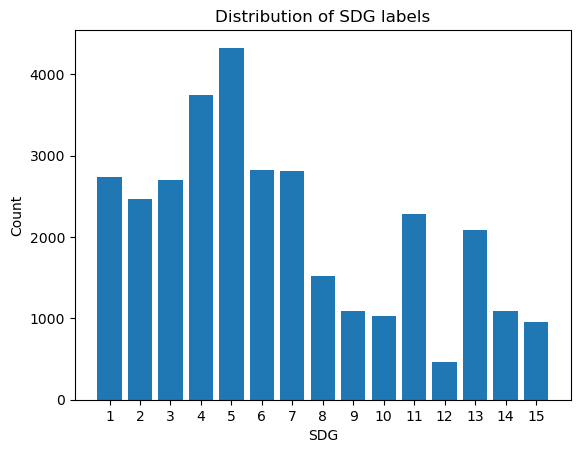

In [133]:
sdg_counts = df['sdg'].value_counts()
plt.bar(sdg_counts.index, sdg_counts.values)

plt.xticks(sdg_counts.index)
plt.xlabel('SDG')
plt.ylabel('Count')
plt.title('Distribution of SDG labels')

plt.show()

## Create WordClouds


In [134]:
# Import nltk packages and Punkt Tokenizer Models
import nltk

nltk.download("punkt")
import warnings

warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /Users/pan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [135]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

sdg_1, sdg_2, sdg_3, sdg_4, sdg_5, sdg_6, sdg_7, sdg_8, sdg_9, sdg_10, sdg_11, sdg_12, sdg_13, sdg_14, sdg_15 = '', '','','','','','','','','','','','','',''

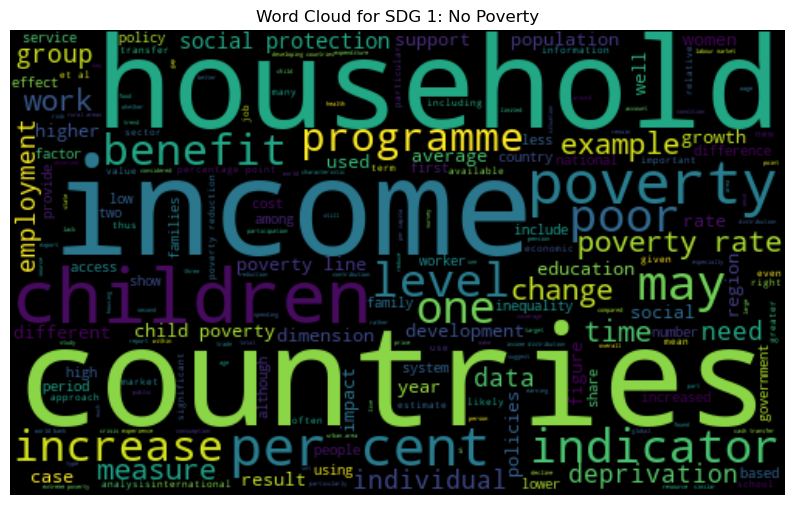

In [136]:
# Creating a corpus of sdg1
for val in df[df['sdg'] == 1].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        sdg_1 = sdg_1 + words + ' '

sdg1_wordcloud = WordCloud(width=500, height=300).generate(sdg_1)

if sdg_1:
    sdg1_wordcloud = WordCloud(width=500, height=300).generate(sdg_1)
    plt.figure( figsize=(10,8), facecolor='w')
    plt.imshow(sdg1_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for SDG 1: No Poverty")
    plt.show()
else:
    print("No text data associated with SDG 1.")

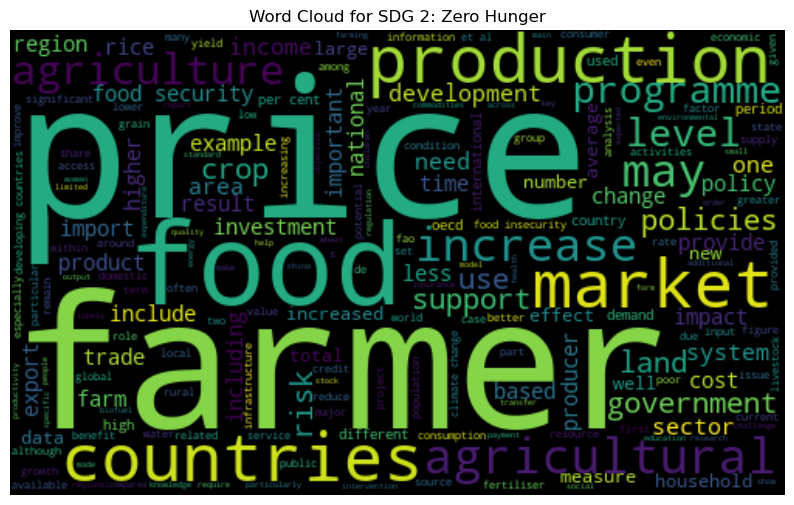

In [137]:
# Creating a corpus of sdg2
for val in df[df['sdg'] == 2].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        sdg_2 = sdg_2 + words + ' '

sdg2_wordcloud = WordCloud(width=500, height=300).generate(sdg_2)

if sdg_2:
    sdg2_wordcloud = WordCloud(width=500, height=300).generate(sdg_2)
    plt.figure(figsize=(10, 8), facecolor='w')
    plt.imshow(sdg2_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for SDG 2: Zero Hunger")
    plt.show()
else:
    print("No text data associated with SDG 2.")

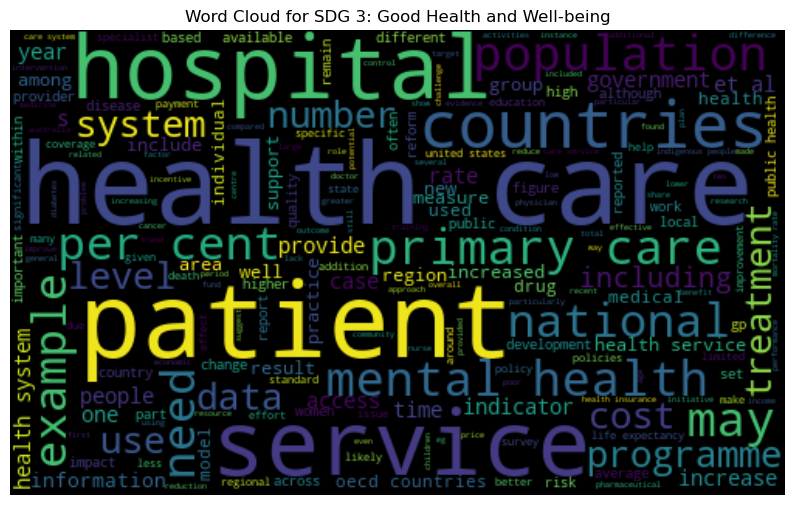

In [138]:
# Creating a corpus of sdg3
for val in df[df['sdg'] == 3].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        sdg_3 = sdg_3 + words + ' '

sdg3_wordcloud = WordCloud(width=500, height=300).generate(sdg_3)

if sdg_3:
    sdg3_wordcloud = WordCloud(width=500, height=300).generate(sdg_3)
    plt.figure(figsize=(10, 8), facecolor='w')
    plt.imshow(sdg3_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for SDG 3: Good Health and Well-being")
    plt.show()
else:
    print("No text data associated with SDG 3.")

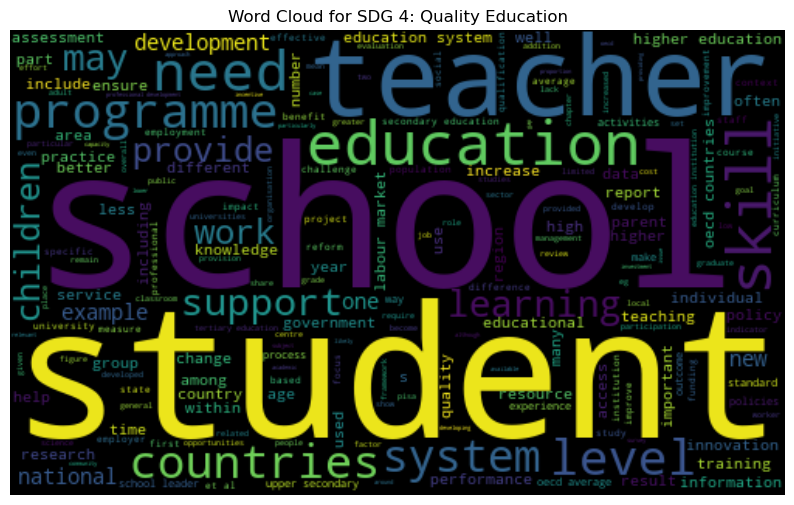

In [139]:
# Creating a corpus of sdg4
for val in df[df['sdg'] == 4].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        sdg_4 = sdg_4 + words + ' '

sdg4_wordcloud = WordCloud(width=500, height=300).generate(sdg_4)

if sdg_4:
    sdg4_wordcloud = WordCloud(width=500, height=300).generate(sdg_4)
    plt.figure(figsize=(10, 8), facecolor='w')
    plt.imshow(sdg4_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for SDG 4: Quality Education")
    plt.show()
else:
    print("No text data associated with SDG 4.")

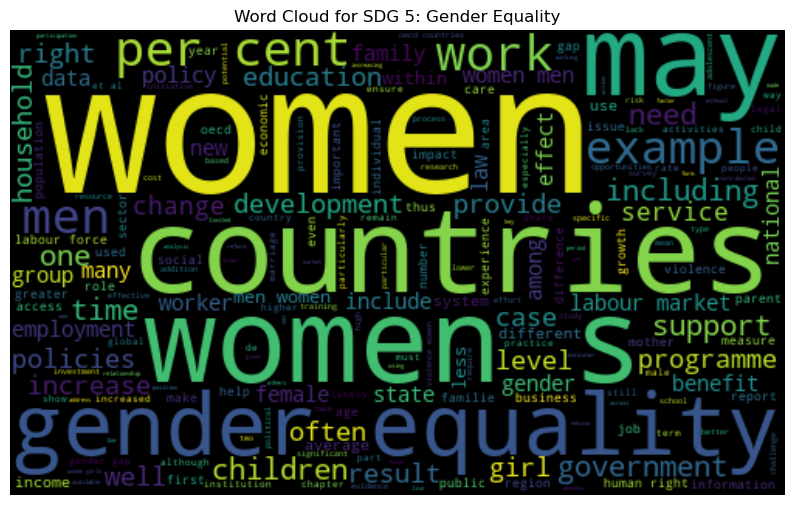

In [140]:
# Creating a corpus of sdg5
for val in df[df['sdg'] == 5].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        sdg_5 = sdg_5 + words + ' '

sdg5_wordcloud = WordCloud(width=500, height=300).generate(sdg_5)

if sdg_5:
    sdg5_wordcloud = WordCloud(width=500, height=300).generate(sdg_5)
    plt.figure( figsize=(10,8), facecolor='w')
    plt.imshow(sdg5_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for SDG 5: Gender Equality")
    plt.show()
else:
    print("No text data associated with SDG 5.")

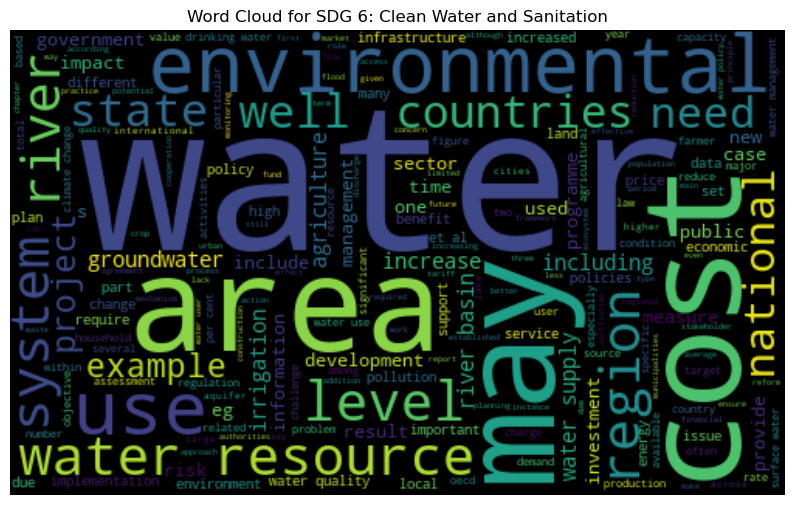

In [141]:
# Creating a corpus of sdg6
for val in df[df['sdg'] == 6].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        sdg_6 = sdg_6 + words + ' '

sdg6_wordcloud = WordCloud(width=500, height=300).generate(sdg_6)

if sdg_6:
    sdg6_wordcloud = WordCloud(width=500, height=300).generate(sdg_6)
    plt.figure( figsize=(10,8), facecolor='w')
    plt.imshow(sdg6_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for SDG 6: Clean Water and Sanitation")
    plt.show()
else:
    print("No text data associated with SDG 6.")

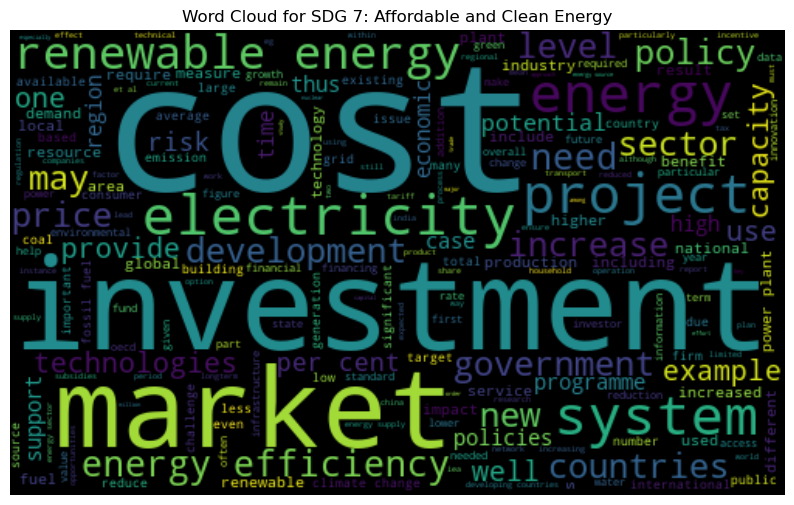

In [142]:
# Creating a corpus of sdg7
for val in df[df['sdg'] == 7].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        sdg_7 = sdg_7 + words + ' '

sdg7_wordcloud = WordCloud(width=500, height=300).generate(sdg_7)

if sdg_7:
    sdg7_wordcloud = WordCloud(width=500, height=300).generate(sdg_7)
    plt.figure( figsize=(10,8), facecolor='w')
    plt.imshow(sdg7_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for SDG 7: Affordable and Clean Energy")
    plt.show()
else:
    print("No text data associated with SDG 7.")

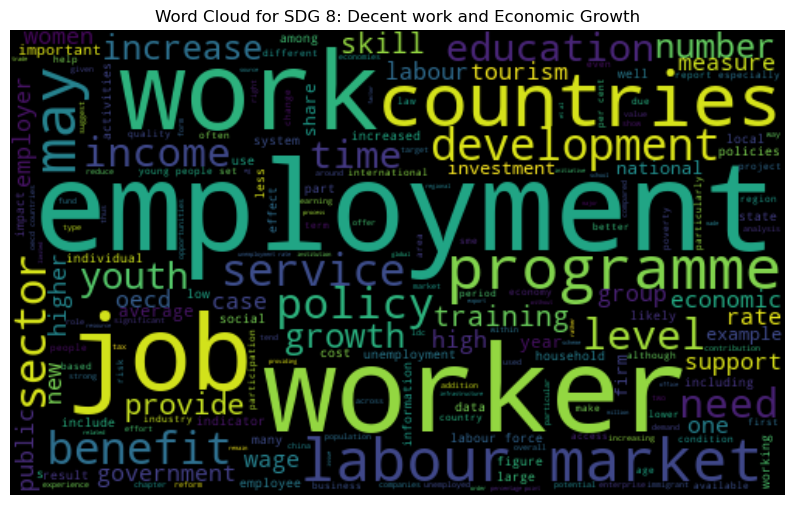

In [143]:
# Creating a corpus of sdg8
for val in df[df['sdg'] == 8].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        sdg_8 = sdg_8 + words + ' '

sdg8_wordcloud = WordCloud(width=500, height=300).generate(sdg_8)

if sdg_8:
    sdg8_wordcloud = WordCloud(width=500, height=300).generate(sdg_8)
    plt.figure( figsize=(10,8), facecolor='w')
    plt.imshow(sdg8_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for SDG 8: Decent work and Economic Growth")
    plt.show()
else:
    print("No text data associated with SDG 8.")

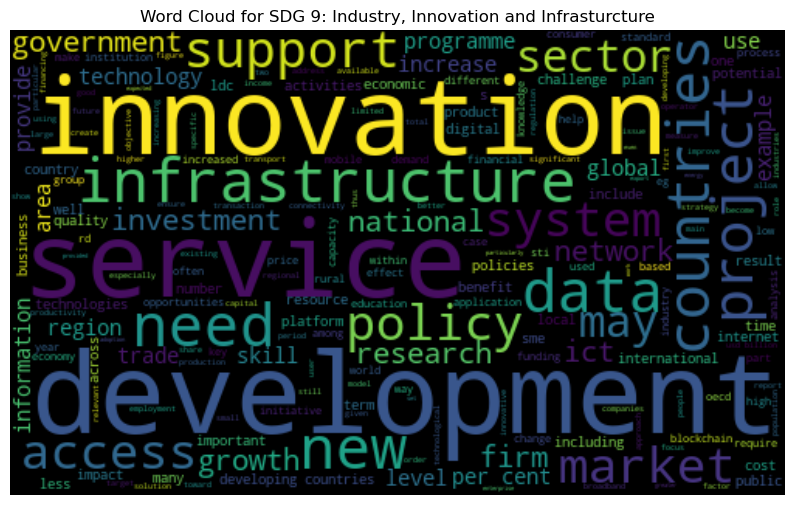

In [144]:
# Creating a corpus of sdg9
for val in df[df['sdg'] == 9].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        sdg_9 = sdg_9 + words + ' '

sdg9_wordcloud = WordCloud(width=500, height=300).generate(sdg_9)

if sdg_9:
    sdg9_wordcloud = WordCloud(width=500, height=300).generate(sdg_9)
    plt.figure( figsize=(10,8), facecolor='w')
    plt.imshow(sdg9_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for SDG 9: Industry, Innovation and Infrasturcture")
    plt.show()
else:
    print("No text data associated with SDG 9.")

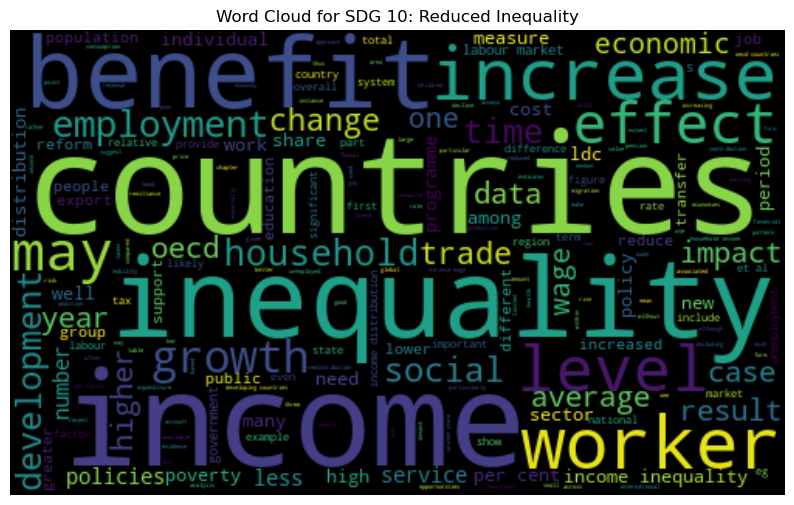

In [145]:
# Creating a corpus of sdg10
for val in df[df['sdg'] == 10].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        sdg_10 = sdg_10 + words + ' '

sdg10_wordcloud = WordCloud(width=500, height=300).generate(sdg_10)

if sdg_10:
    sdg10_wordcloud = WordCloud(width=500, height=300).generate(sdg_10)
    plt.figure( figsize=(10,8), facecolor='w')
    plt.imshow(sdg10_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for SDG 10: Reduced Inequality")
    plt.show()
else:
    print("No text data associated with SDG 10.")

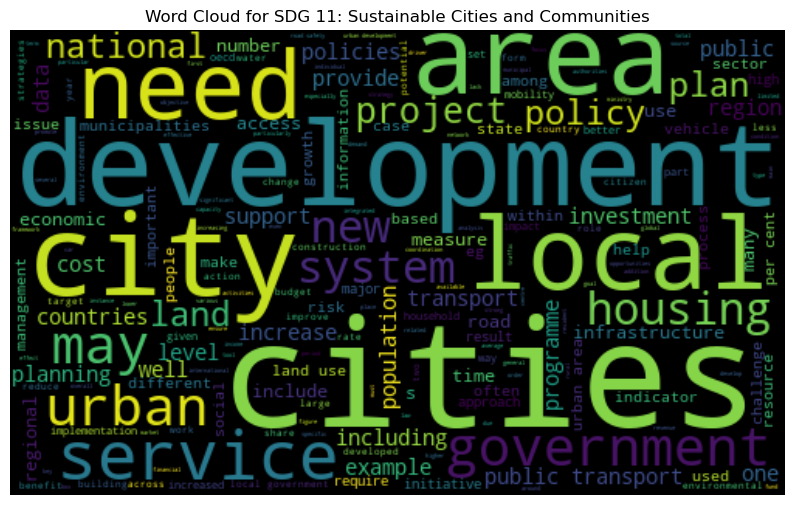

In [146]:
# Creating a corpus of sdg11
for val in df[df['sdg'] == 11].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        sdg_11 = sdg_11 + words + ' '

sdg11_wordcloud = WordCloud(width=500, height=300).generate(sdg_11)

if sdg_11:
    sdg11_wordcloud = WordCloud(width=500, height=300).generate(sdg_11)
    plt.figure(figsize=(10, 8), facecolor='w')
    plt.imshow(sdg11_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for SDG 11: Sustainable Cities and Communities")
    plt.show()
else:
    print("No text data associated with SDG 11.")

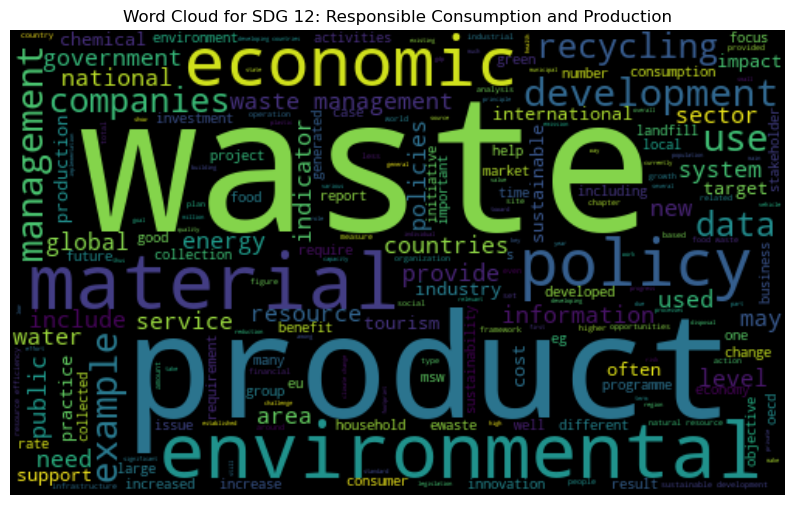

In [147]:
# Creating a corpus of sdg12
for val in df[df['sdg'] == 12].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        sdg_12 = sdg_12 + words + ' '

sdg12_wordcloud = WordCloud(width=500, height=300).generate(sdg_12)

if sdg_12:
    sdg12_wordcloud = WordCloud(width=500, height=300).generate(sdg_12)
    plt.figure( figsize=(10,8), facecolor='w')
    plt.imshow(sdg12_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for SDG 12: Responsible Consumption and Production")
    plt.show()
else:
    print("No text data associated with SDG 12.")

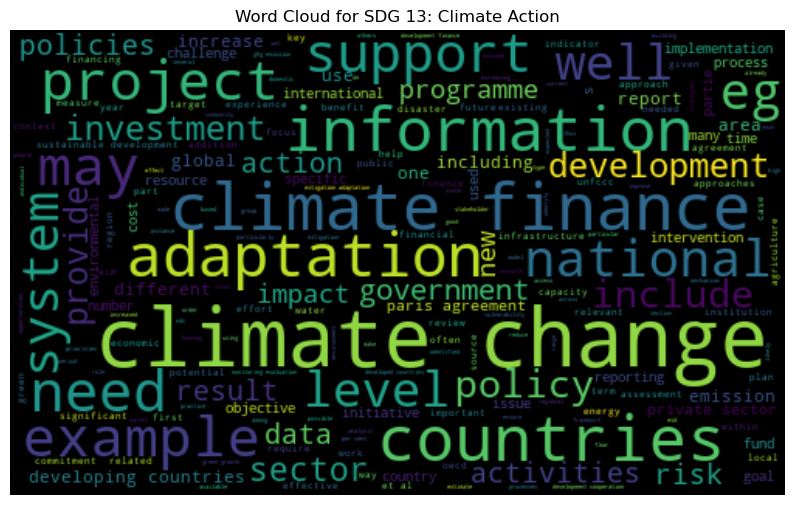

In [148]:
# Creating a corpus of sdg13
for val in df[df['sdg'] == 13].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        sdg_13 = sdg_13 + words + ' '

sdg13_wordcloud = WordCloud(width=500, height=300).generate(sdg_13)

if sdg_13:
    sdg13_wordcloud = WordCloud(width=500, height=300).generate(sdg_13)
    plt.figure( figsize=(10,8), facecolor='w')
    plt.imshow(sdg13_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for SDG 13: Climate Action")
    plt.show()
else:
    print("No text data associated with SDG 13.")

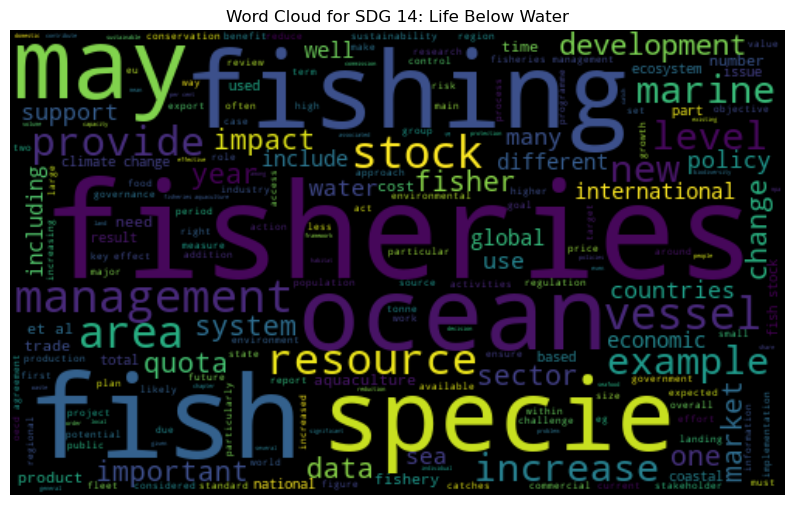

In [149]:
# Creating a corpus of sdg14
for val in df[df['sdg'] == 14].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        sdg_14 = sdg_14 + words + ' '

sdg14_wordcloud = WordCloud(width=500, height=300).generate(sdg_14)

if sdg_14:
    sdg14_wordcloud = WordCloud(width=500, height=300).generate(sdg_14)
    plt.figure( figsize=(10,8), facecolor='w')
    plt.imshow(sdg14_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for SDG 14: Life Below Water")
    plt.show()
else:
    print("No text data associated with SDG 14.")

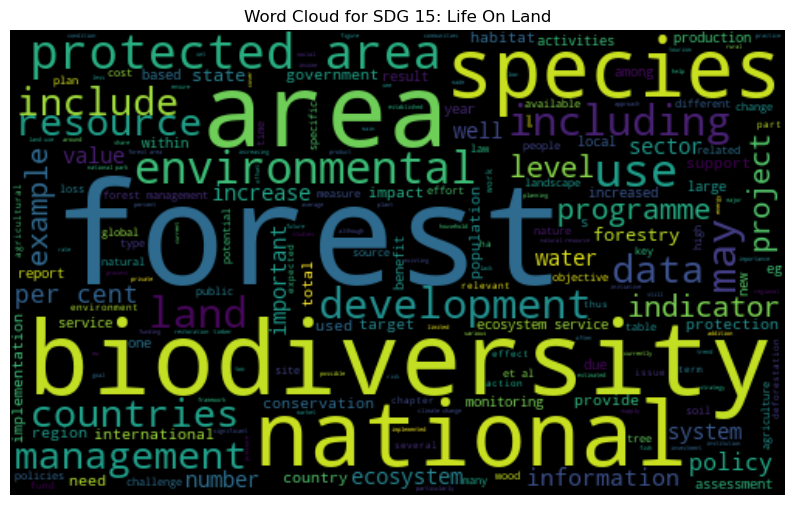

In [150]:
# Creating a corpus of sdg15
for val in df[df['sdg'] == 15].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        sdg_15 = sdg_15 + words + ' '

sdg15_wordcloud = WordCloud(width=500, height=300).generate(sdg_15)

if sdg_15:
    sdg15_wordcloud = WordCloud(width=500, height=300).generate(sdg_15)
    plt.figure( figsize=(10,8), facecolor='w')
    plt.imshow(sdg15_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for SDG 15: Life On Land")
    plt.show()
else:
    print("No text data associated with SDG 15.")

## Select confident instances

In [151]:
# select confident instances (based on agreement score) to train the model
data = df[df['agreement'] >= 0.6]
data = data.drop(['agreement'], axis = 1)

data_k = df.drop(['agreement'], axis = 1)

In [152]:
data

text  sdg
0      gender perspective Paulgaard points labour mar...    5
2      average figure also masks large differences ac...    3
7      Israel Oceanographic Limnological Research sta...    6
8      Previous chapters discussed ways make food sys...    2
11     Prescription rates appear higher labour force ...    8
...                                                  ...  ...
32111  factbased management approach successful imple...   14
32112  Nevertheless survey Encuesta de Caracterizacio...    5
32115  also features individual accountability means ...    4
32117  Groundwater quality also affected contaminatio...    6
32119  three diseases resulted greatest number lost l...    3

[18945 rows x 2 columns]

In [153]:
data_k

text  sdg
0      gender perspective Paulgaard points labour mar...    5
1      Labour legislation regulates maximum working h...   11
2      average figure also masks large differences ac...    3
3      extent akin corruption difficult assess 2005 g...    3
4      region reporting higher rate earn points indic...    3
...                                                  ...  ...
32115  also features individual accountability means ...    4
32116  Since full capacity likely utilized multiply p...    7
32117  Groundwater quality also affected contaminatio...    6
32118  Remedier ces lacunes est la recommandation pri...    2
32119  three diseases resulted greatest number lost l...    3

[32120 rows x 2 columns]

## Convert words to vectors using TFIDF Vectorizer

In [154]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(data['text'])

vectors_k = vectorizer.fit_transform(data_k['text'])
# vectors.shape
# vectors_k.shape

In [155]:
# features = word_vectors
X = vectors
y = data['sdg']

X_k = vectors_k
y_k = data_k['sdg']

## Create K means label

In [156]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=15, random_state=0).fit(X_k)
labels = kmeans.labels_
label_names = ['cluster' + str(i+1) for i in range(15)]

In [157]:
data_k['label'] = [label_names[label] for label in labels]
data_k

text  sdg      label
0      gender perspective Paulgaard points labour mar...    5   cluster4
1      Labour legislation regulates maximum working h...   11   cluster4
2      average figure also masks large differences ac...    3   cluster2
3      extent akin corruption difficult assess 2005 g...    3  cluster12
4      region reporting higher rate earn points indic...    3  cluster12
...                                                  ...  ...        ...
32115  also features individual accountability means ...    4   cluster5
32116  Since full capacity likely utilized multiply p...    7  cluster12
32117  Groundwater quality also affected contaminatio...    6  cluster15
32118  Remedier ces lacunes est la recommandation pri...    2   cluster4
32119  three diseases resulted greatest number lost l...    3  cluster12

[32120 rows x 3 columns]

## Split data into training and test set

In [158]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Build classifiers with scikit-learn

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)

# create a dictionary of variables and models
clfs = {'SVM': svc, 'KN': knc, 'DT': dtc, 'LR': lrc, 'RF': rfc}

In [160]:
# fit the data onto the models
def train(clf, X, y):
    clf.fit(X, y)

def predict(clf, X):
    return (clf.predict(X))

In [161]:
results_df = pd.DataFrame(columns=['Classifier', 'Accuracy', 'F1 Score'])

for k, v in clfs.items():
    train(v, X_train, y_train)
    pred = predict(v, X_test)

    acc = accuracy_score(y_test , pred)
    f1 = f1_score(y_test, pred, average='weighted')
    results_df = results_df.append({'Classifier': k, 'Accuracy': acc, 'F1 Score': f1}, ignore_index=True)

In [162]:
f1 = f1_score(y_k, labels, average='weighted')
acc = accuracy_score(y_k, labels)
results_df = results_df.append({'Classifier': 'K-Means', 'Accuracy': acc, 'F1 Score': f1}, ignore_index=True)

In [163]:
results_df

Classifier  Accuracy  F1 Score
0        SVM  0.822381  0.820476
1         KN  0.782001  0.776206
2         DT  0.667458  0.667307
3         LR  0.808921  0.806015
4         RF  0.766693  0.755932
5    K-Means  0.120828  0.128333

## Predict new data

In [164]:
#write function to detect which SDG the text belongs to
def sdg_class(text):
    newtext = [text]
    integers = vectorizer.transform(newtext)
    label = svc.predict(integers)
    print(f'This text belongs to SDG {label[0]}.')


In [165]:
txt = 'Predicting air quality is necessary step to be taken by government as it is becoming the major concern among the health of human beings. Air quality Index measure the quality of air. Various air pollutants causing air pollution are Carbon dioxide, Nitrogen dioxide, carbon monoxide etc that are released from burning of natural gas, coal and wood, industries, vehicles etc. Air Pollution can cause severe disease like lungs cancer, brain disease and even lead to death. '
sdg_class(txt)

ValueError: X has 62452 features, but SVC is expecting 45356 features as input.

In [ ]:
t = 'The structure, efficiency, and growth of production affect (and are affected by) the distribution of consumption. Poverty analysis has three tasks: (1) to define and describe “poverty,” (2) to understand its causes, and (3) to inform policy. This chapter outlines history of economic thought on poverty since the mercantilists, concentrating on relevance to current economic analysis and policy. It examines how poverty is defined and measured. Evidence from modern household surveys has allowed in the examination of the interactions between demographic, nutritional, and labor-force characteristics of poverty groups. In this process, modern economics is developing some of the central insights of the classical economists, though with measurement and modeling methods not available to them. The chapter discusses the classic development issue of the effect of growth on poverty and inequality, and (the recent classic) macroeconomic adjustment and the poor. It explores several issues that arise in governmental attempts to reduce poverty through direct interventions.'
sdg_class(t)